In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
import numpy as np

In [3]:
(train_datas, train_targets), (test_datas, test_targets) = boston_housing.load_data()

In [4]:
# 각 열의 평균을 구함
mean = train_datas.mean(axis=0)

# 각 열의 데이터에서 평균을 뺌
train_datas -= mean

# 각 열의 표준편차를 구함
std = train_datas.std(axis=0)

# 각 열의 데이터를 표준편차로 나눔
train_datas /= std

# test 데이터 또한 표준화
test_datas -= mean
test_datas /= std

In [5]:
def build_model() :
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [7]:
k = 4

# 나눗셈의 몫 -> 101
num_val_samples = len(train_datas) // k

num_epochs = 100
all_scores = []

for i in range(k) : # 4번 반복(4개의 fold)
    print(f"#{i}번째 폴드 처리중")
    val_data = train_datas[i * num_val_samples : (i + 1) * num_val_samples] # slicing을 통해 0에서 100까지를 val_data (0번째 fold)
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples] # slicing을 통해 0에서 100까지를 val_data (0번째 fold)
    partial_train_data = np.concatenate( # 훈련 데이터 준비: 다른 분할 전체 (1, 2, 3번째 fold)
        [train_datas[:i * num_val_samples], # slicing을 통해 0까지를 partial_train_data (여기서는 x) 둘을 붙임
         train_datas[(i + 1) * num_val_samples:]], # slicing을 통해 101부터 404까지를 partial_train_data (1, 2, 3번째 fold) 둘을 붙임
        axis=0) 
    partial_train_target = np.concatenate( # 훈련 타겟 준비: 다른 분할 전체 (1, 2, 3번째 fold)
        [train_targets[:i * num_val_samples], # slicing을 통해 0까지를 partial_train_target (여기서는 x) 둘을 붙임
         train_targets[(i + 1) * num_val_samples:]], # slicing을 통해 101부터 404까지를 partial_train_target (1, 2, 3번째 fold) 둘을 붙임
        axis=0)
    model = build_model() # 모델 구성(컴파일 포함)
    model.fit(partial_train_data, partial_train_target, epochs=num_epochs, batch_size=16, verbose=0) # verbose = 0 훈련 과정이 출력되지 않음
    # 훈련 데이터로 검증 없이 모델을 훈련
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0) # 훈련한 모델을 통해 검증 데이터를 평가
    all_scores.append(val_mae) # all_scores에 해당 fold의 mae값 저장

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
all_scores

[2.0602781772613525, 2.73694109916687, 2.4969913959503174, 2.617584466934204]

In [30]:
num_epochs = 500 # epochs를 증가시켜 훈련
all_mae_histories = [] # 에프크마다 각 폴드의 검증 점수를 로그에 저장

for i in range(k) : # 4번 반복(4개의 fold)
    print(f"#{i}번째 폴드 처리중")
    val_data = train_datas[i * num_val_samples : (i + 1) * num_val_samples] # slicing을 통해 0에서 100까지를 val_data (0번째 fold)
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples] # slicing을 통해 0에서 100까지를 val_data (0번째 fold)
    partial_train_data = np.concatenate( # 훈련 데이터 준비: 다른 분할 전체 (1, 2, 3번째 fold)
        [train_datas[:i * num_val_samples], # slicing을 통해 0까지를 partial_train_data (여기서는 x) 둘을 붙임
         train_datas[(i + 1) * num_val_samples:]], # slicing을 통해 101부터 404까지를 partial_train_data (1, 2, 3번째 fold) 둘을 붙임
        axis=0) 
    partial_train_target = np.concatenate( # 훈련 타겟 준비: 다른 분할 전체 (1, 2, 3번째 fold)
        [train_targets[:i * num_val_samples], # slicing을 통해 0까지를 partial_train_target (여기서는 x) 둘을 붙임
         train_targets[(i + 1) * num_val_samples:]], # slicing을 통해 101부터 404까지를 partial_train_target (1, 2, 3번째 fold) 둘을 붙임
        axis=0)
    model = build_model() # 모델 구성(컴파일 포함)
    history = model.fit(partial_train_data, partial_train_target, 
                        validation_data = (val_data, val_targets), 
                        epochs=num_epochs, batch_size=16, verbose=0) # verbose = 0 훈련 과정이 출력되지 않음
    # 검증 데이터를 추가하여 훈련
    # 각 훈련마다 기록을 histroy에 저장
    
    mae_history = history.history['val_mae'] # history에서 val_mae의 값만 추출하여 저장
    all_mae_histories.append(mae_history) # all_scores_histories에 해당 fold의 훈련 과정에서의 mae값 저장

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [31]:
all_mae_histories

[[18.653701782226562,
  15.133523941040039,
  10.758466720581055,
  7.012012004852295,
  4.863457202911377,
  3.9681975841522217,
  3.611459255218506,
  3.3640220165252686,
  3.0752415657043457,
  3.057232618331909,
  2.958933115005493,
  2.879467725753784,
  2.9130349159240723,
  2.8097081184387207,
  2.7066142559051514,
  2.5914833545684814,
  2.6521201133728027,
  2.612834930419922,
  2.665412425994873,
  2.4639039039611816,
  2.447200298309326,
  2.328603506088257,
  2.4118154048919678,
  2.3208560943603516,
  2.2577457427978516,
  2.227208375930786,
  2.2659082412719727,
  2.2127394676208496,
  2.19522762298584,
  2.137641429901123,
  2.1915526390075684,
  2.170944929122925,
  2.0854506492614746,
  2.094074249267578,
  2.1139254570007324,
  2.0534822940826416,
  2.1096179485321045,
  2.063267946243286,
  2.077272891998291,
  2.0370306968688965,
  2.067166566848755,
  2.031343936920166,
  2.0011401176452637,
  2.058709144592285,
  2.048638105392456,
  1.974985957145691,
  2.2723007

In [32]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
# all_mae_histories에 저장된 각 에포크의 값들을 평균
# 각 에포크마다 fold들의 평균 mae가 저장

In [34]:
average_mae_history

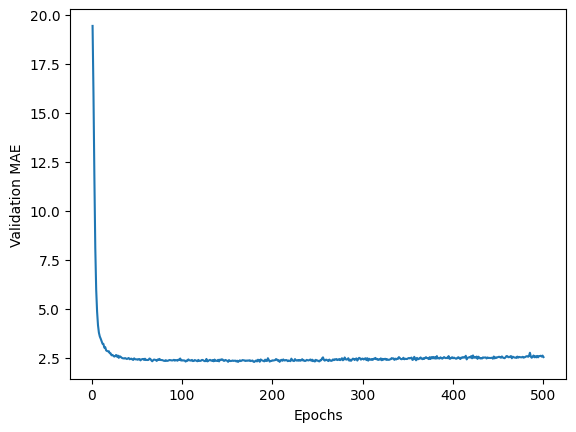

In [35]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

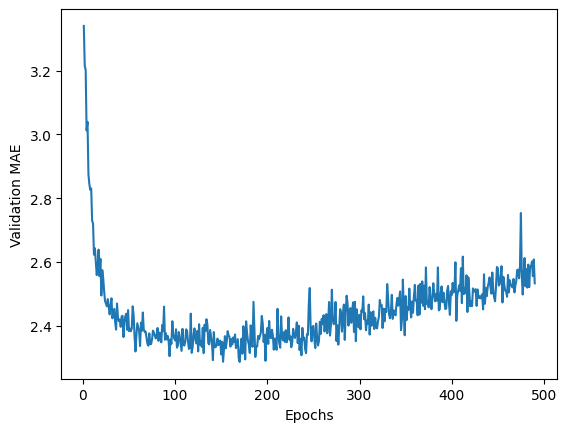

In [36]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# 120 ~ 140번째 에포크 이후 줄어드는 것이 멈춤

In [37]:
model = build_model()
model.fit(train_datas, train_targets, epochs=130, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_datas, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.0399 - mae: 2.4690
